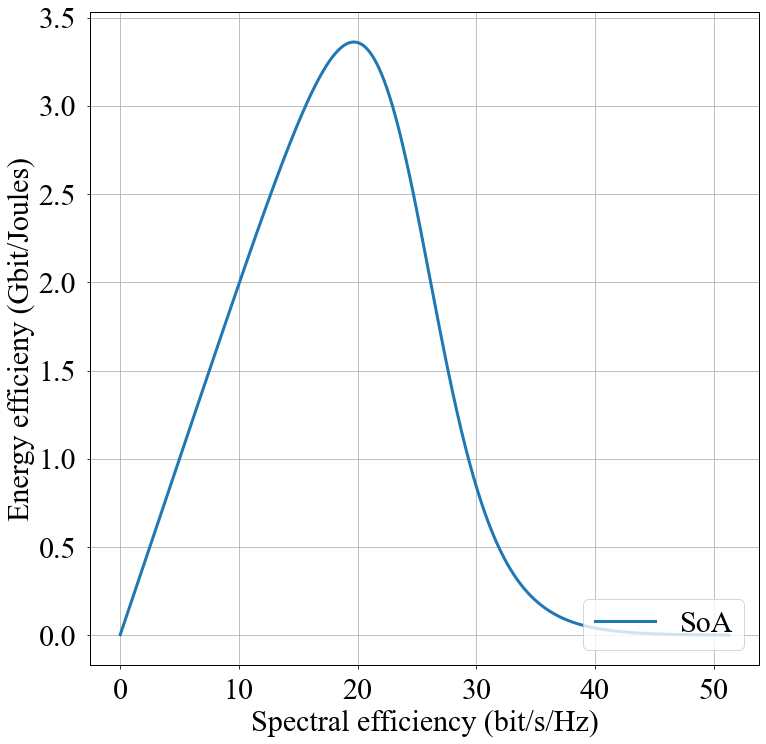

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

mpl.rcParams['axes.linewidth'] = 1
plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams["font.family"] = "Times New Roman"
plt.tick_params(axis='both', which='major', pad=10)
marker_style = dict(linestyle='-', markersize=15, markeredgewidth=2.5, linewidth=3, fillstyle='none', clip_on=False)

SoA_x = []
SoA_y = []
UAV_CONSTANT_POWER = 10

class Blob():
    def __init__(self, USER1=False, USER2=False, USER3=False, USER4=False):
        if USER1:
            self.x = 35
            self.y = 54
        elif USER2:
            self.x = 94
            self.y = 1
        elif USER3:
            self.x = 29
            self.y = 45
        elif USER4:
            self.x = 1
            self.y = 97

    def __sub__(self, other):
        return [(self.x-other.x)/10, (self.y-other.y)/10]
    
class BlobEnv():
    
    def __init__(self):
        
        P_T = 10 ** ( (p-30) / 10 )
        N_uav = 8
        N_ue = 8
        G = N_uav * N_ue
        P = P_T * G
        W = 2e9 # Bandwidth 2GHz
        fc = 28e9 # Carrier frequency = 28GHz
        NF = 10**(5/10) # 5dB Noise Figure 
        TN = 10**(-114/10) # -84dBm Thermal Noise
        N = NF * TN
        H2 = 50
        C_LOS = 10**(-6.4)
        a_LOS = 2
        self.UAV2 = UAV2
        self.USER1 = USER1
        self.USER2 = USER2
        self.USER3 = USER3
        self.USER4 = USER4
        
        self.UAV2.x = int((self.USER1.x +self.USER2.x + self.USER3.x + self.USER4.x)/4)
        self.UAV2.y = int((self.USER1.y +self.USER2.y + self.USER3.y + self.USER4.y)/4)

        ob21 = self.UAV2-self.USER1
        ob22 = self.UAV2-self.USER2
        ob23 = self.UAV2-self.USER3
        ob24 = self.UAV2-self.USER4

        Dt21 = np.sum(np.sqrt([ (10*ob21[0])**2, (10*ob21[1])**2, H2**2  ]))
        Dt22 = np.sum(np.sqrt([ (10*ob22[0])**2, (10*ob22[1])**2, H2**2  ]))
        Dt23 = np.sum(np.sqrt([ (10*ob23[0])**2, (10*ob23[1])**2, H2**2  ]))
        Dt24 = np.sum(np.sqrt([ (10*ob24[0])**2, (10*ob24[1])**2, H2**2  ]))

        h221 = C_LOS * Dt21**(-a_LOS)
        h222 = C_LOS * Dt22**(-a_LOS)
        h223 = C_LOS * Dt23**(-a_LOS)
        h224 = C_LOS * Dt24**(-a_LOS)
        
        r = 0
        
        
        if h221 >= h222:
                a222 = ((2**r - 1)/2**r) * (1 + N/(P*h222))
                if a222 >= 1:
                  a222 = 1
                a221 = 1 - a222
                SUM221 = math.log2(1 + h221 * a221 * P/N)
                SUM222 = math.log2(1 + a222 * h222 * P / (a221 * h222 * P + N) )
        else: 
                a221 = ((2**r - 1)/2**r) * (1 + N/(P*h221))
                if a221 >= 1:
                  a221 = 1
                a222 = 1-a221
                SUM221 = math.log2(1 + a221 * h221 * P / (a222 * h221 * P + N) )
                SUM222 =  math.log2(1 + h222 * a222 * P/N)
                
        if h223 >= h224:

                a224 = ((2**r - 1)/2**r) * (1 + N/(P*h224))
                if a224 >= 1:
                  a224 = 1
                a223 = 1 - a224
                SUM223 = math.log2(1 + h223 * a223 * P/N)
                SUM224 = math.log2(1 + a224 * h224 * P / (a223 * h224 * P + N) ) 
        else: 
                a223 = ((2**r - 1)/2**r) * (1 + N/(P*h223))
                if a223 >= 1:
                  a223 = 1
                a224 = 1 - a223
                SUM223 = math.log2(1 + a223 * h223 * P / (a224 * h223 * P + N) )
                SUM224 = math.log2(1 + h224 * a224 * P/N)
                        
        average_sum_rate2 =  SUM221 + SUM222 + SUM223 + SUM224  
        SoA_x.append(average_sum_rate2)
        SoA_y.append( average_sum_rate2 * 2 / ( P_T + UAV_CONSTANT_POWER) )


UAV2 = Blob()
USER1 = Blob(True, False, False, False)
USER2 = Blob(False, True, False, False)
USER3 = Blob(False, False, True, False)
USER4 = Blob(False, False, False, True)

for p in np.arange(-20, 80, 0.1):
    em = BlobEnv()
    
with open(f"SoA_x-EE.pickle", "wb") as f:
                      pickle.dump(SoA_x, f)
        
with open(f"SoA_y-EE.pickle", "wb") as f:
                      pickle.dump(SoA_y, f)

plt.plot(SoA_x, SoA_y, label="SoA", **marker_style)
plt.xlabel('Spectral efficiency (bit/s/Hz)')
plt.ylabel('Energy efficieny (Gbit/Joules)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [3]:
print(len(SoA_y))

1000
